**Introduction of the dataset**

This database contains detailed candidate‐level data for elections to the lower houses of India’s national
and state legislatures, i.e., the Lok Sabha and Vidhan Sabhas. The data span 1977‐2015, with each row
representing a candidate that ran for office in that state‐year.

**Data Description**

Variable name :     Storage:     type Variable contents
st_name :     str35 :     State

Year :     Int :     General election year

pc_no :     Byte :     Parliamentary constituency number

pc_name :     str25 :     Parliamentary constituency name

pc_type :     str3 :     Parliamentary constituency reservation status

cand_name :     str70 :     Candidate name

cand_sex :     str1 :     Candidate sex

partyname :     str57 :     Party name

partyabbre :     str10 :     Party abbreviation

totvotpoll :     Long :     Votes received

electors :     Long :     Number of registered voters

**Potential Target Variables:**

**totvotpoll**: The total votes polled for each candidate.

**partyname**: The party name if the analysis is focused on predicting or analyzing party performance.

**cand_name**: The candidate name if the analysis is focused on predicting the winning candidate.  

**For this dataset I am choosing the target variable:**

**Total Votes Polled (totvotpoll)**: This is a straightforward target for predicting the number of votes a candidate receives. It provides a quantitative outcome that can be modeled using regression techniques.

Importing all the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

Importing the dataset

In [ ]:
data = pd.read_csv('/content/sample_data/indian-national-level-election (1).csv')

In [ ]:
data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [ ]:
data.shape

(73081, 11)

In this dataset we have 73081 rows and 11 columns

Dropping the party name because it's not necessary we have the party abbervation.

In [ ]:
data = data.drop('partyname', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyabbre  73081 non-null  object
 8   totvotpoll  73081 non-null  int64 
 9   electors    73081 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,year,pc_no,totvotpoll,electors
count,73081.000000,73081.000000,73081.000000,7.308100e+04
mean,1996.779505,22.311490,49834.760266,1.122277e+06
std,10.432527,19.039793,104893.319706,3.560049e+05
min,1977.000000,1.000000,0.000000,1.947100e+04
25%,1989.000000,7.000000,872.000000,9.129850e+05
50%,1996.000000,18.000000,2743.000000,1.099503e+06
75%,2004.000000,33.000000,19185.000000,1.329086e+06
max,2014.000000,85.000000,863358.000000,3.368399e+06


We are going to rename some columns names for easy understanding.

In [ ]:
data=data.rename(columns={'st_name':'State',
                          'year':'Year',
                          'cand_name':'Candidate',
                          'partyabbre':'Party'})

After describing the dataset in totvotpoll there are some rows has 0 votes lets check how many rows are there.

In [ ]:
zero_count = (data['totvotpoll']==0).sum()
zero_count

5

In this, we know that 5 rows have 0 votes, so we remove these columns.

In [ ]:
zero_row = data[data['totvotpoll'] == 0]
zero_row

,State,Year,pc_no,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
5327,Arunachal Pradesh,1977,1,Arunachal West,GEN,Rinchin Khandu Khimre,M,INC,0,121887
20978,Jammu & Kashmir,1980,2,Srinagar,GEN,Farooq Abdullah,M,JKN,0,519706
21057,Jammu & Kashmir,1989,2,Srinagar,GEN,Mohammad Shafi Bhat,M,JKN,0,782715
39808,Mizoram,1984,1,Mizoram,ST,Lal Dohama,M,INC,0,255676
48901,Sikkim,1977,1,Sikkim,GEN,Chatra Bahadur Chhetri,M,INC,0,124023


In [ ]:
data = data[data['totvotpoll'] != 0]
data

,State,Year,pc_no,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084
...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,42,Birbhum,GEN,None Of The Above,NaN,NOTA,14557,1495089
73077,West Bengal,2014,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,132084,1495089
73078,West Bengal,2014,42,Birbhum,GEN,Joy Banerjee,M,BJP,235753,1495089
73079,West Bengal,2014,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,393305,1495089


In [ ]:
data.shape

(73076, 10)

Now we are going to find the null values in the given dataset.

In [ ]:
data.isnull().sum()

,0
State,0
Year,0
pc_no,0
pc_name,0
pc_type,8070
Candidate,0
cand_sex,542
Party,0
totvotpoll,0
electors,0


In this we can understand that there are 2 columns that has null values. There are:

1.pc_type

2.cand_sex

In [ ]:
data['cand_sex'].value_counts()

,count
cand_sex,
M,68880
F,3648
O,6


In [ ]:
data['cand_sex'].unique()

array(['M', 'F', nan, 'O'], dtype=object)

I decided that the null values can be changed to others.

In [ ]:
data['cand_sex']=data['cand_sex'].fillna('O')

In [ ]:
data['cand_sex'].value_counts()

,count
cand_sex,
M,68880
F,3648
O,548


In [ ]:
data['pc_type'].unique()

array(['GEN', nan, 'ST', 'SC', 'SC '], dtype=object)

I decided the pc_type null values can be changed to others.

In [ ]:
data['pc_type']=data['pc_type'].fillna('Others')

In [ ]:
data['pc_type'].value_counts()

,count
pc_type,
GEN,54858
Others,8070
SC,7293
ST,2840
SC,15


Now there are no null values.

In [ ]:
data.isnull().sum()

,0
State,0
Year,0
pc_no,0
pc_name,0
pc_type,0
Candidate,0
cand_sex,0
Party,0
totvotpoll,0
electors,0


Now we going to visualize to understand the dataset clearly.

We will visualize the total parliamentary constituencies in states and rank to the top 10.

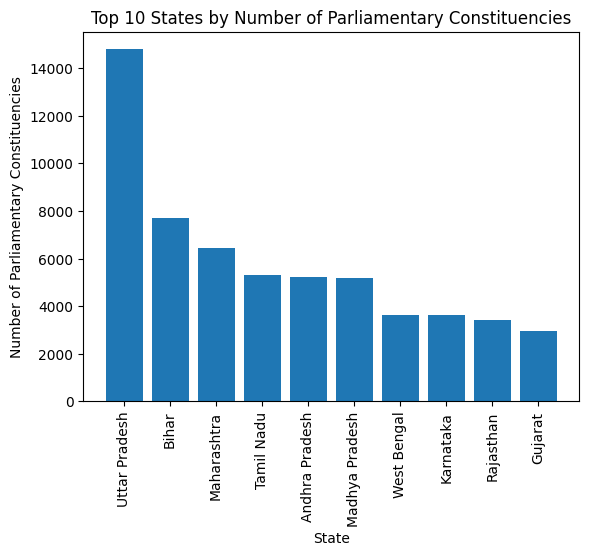

In [ ]:
state_counts = data['State'].value_counts().head(10)
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Number of Parliamentary Constituencies')
plt.title('Top 10 States by Number of Parliamentary Constituencies')
plt.show()

Going to visualize each party counts of the given time limit.

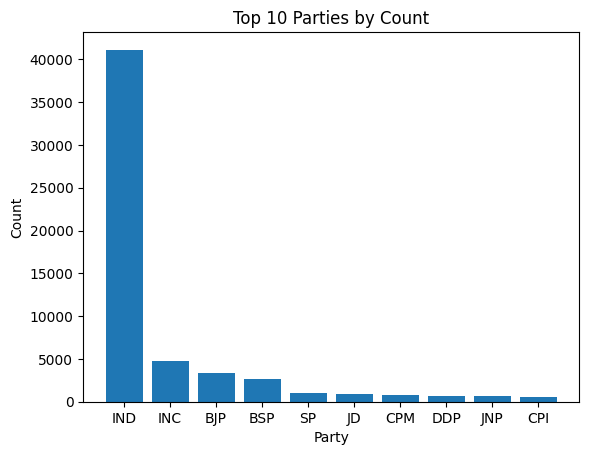

In [ ]:
party_counts = data['Party'].value_counts().head(10)
plt.bar(party_counts.index, party_counts.values)
plt.title('Top 10 Parties by Count')
plt.xlabel('Party')
plt.ylabel('Count')
plt.show()

Going to visualize the percentage reservation status.

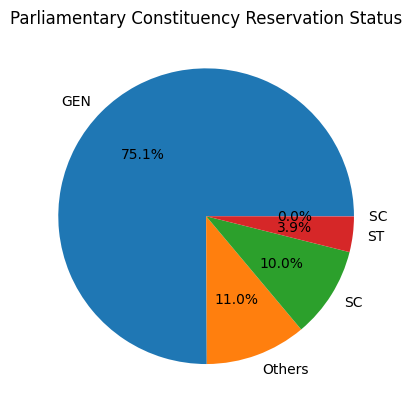

In [ ]:
pc_type_counts = data['pc_type'].value_counts()
plt.pie(pc_type_counts.values, labels=pc_type_counts.index, autopct='%1.1f%%')
plt.title('Parliamentary Constituency Reservation Status')
plt.show()

Going to visualize the total electors of each year.

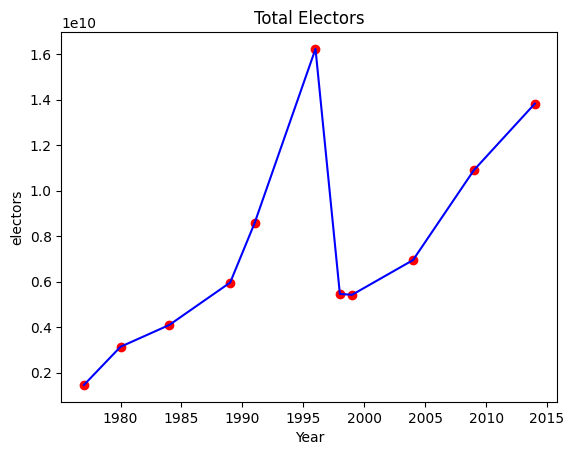

In [ ]:
x = data['Year'].unique()
y = data.groupby('Year')['electors'].sum()
plt.scatter(x,y,color='red')
plt.plot(x,y,color='blue')
plt.xlabel('Year')
plt.ylabel('electors')
plt.title('Total Electors')
plt.show()

Going to visualize top 10 candiates of there totat votes.

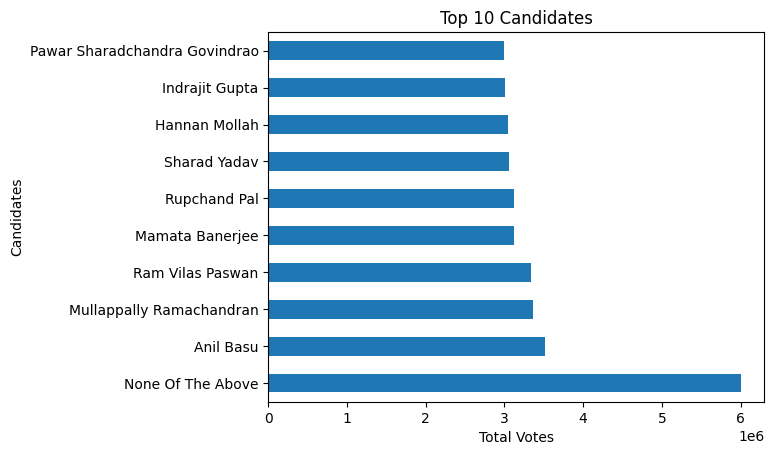

In [ ]:
candiate_votes = pd.DataFrame(data.groupby('Candidate')['totvotpoll'].sum())
order_votes = candiate_votes.sort_values(by='totvotpoll', ascending=False).head(10)
ax = order_votes['totvotpoll'].plot(kind='barh', title='Top 10 Candidates')
ax.set_xlabel('Total Votes')
ax.set_ylabel('Candidates')
plt.show()

Going to visualize of each year party votes and rank it top 8

<Figure size 1500x5000 with 0 Axes>

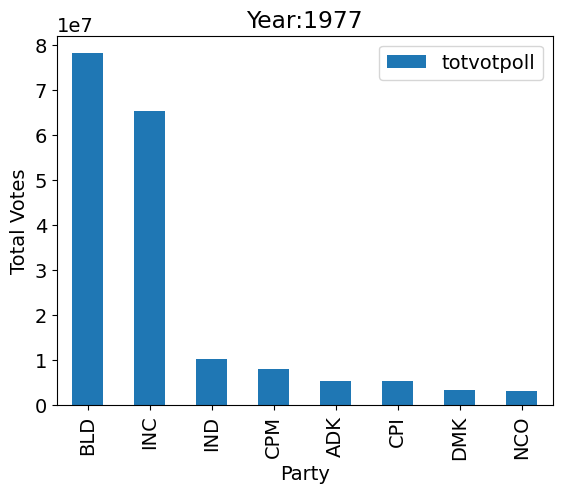

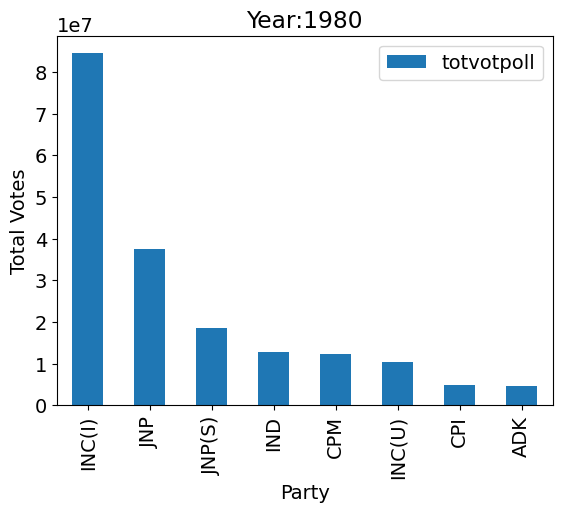

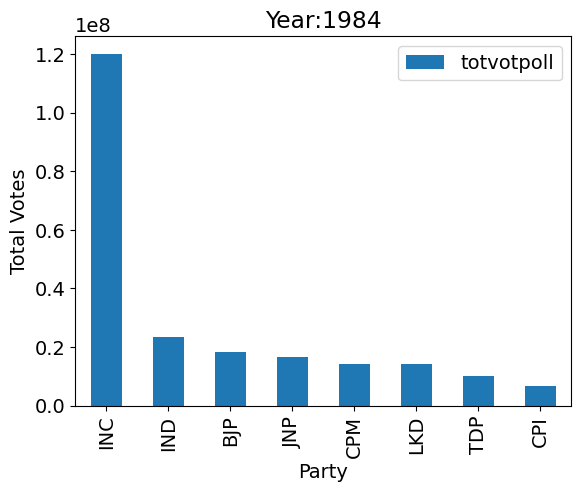

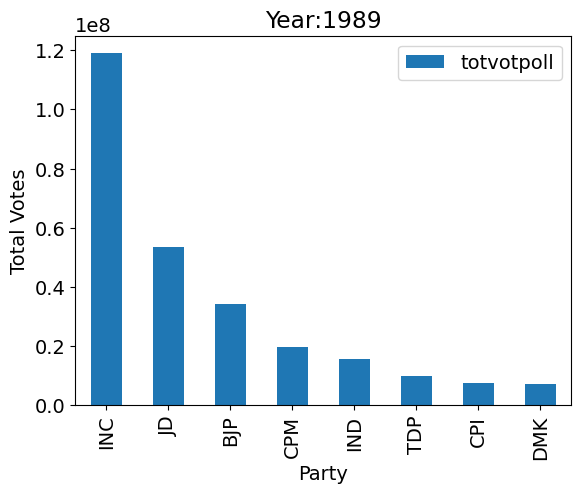

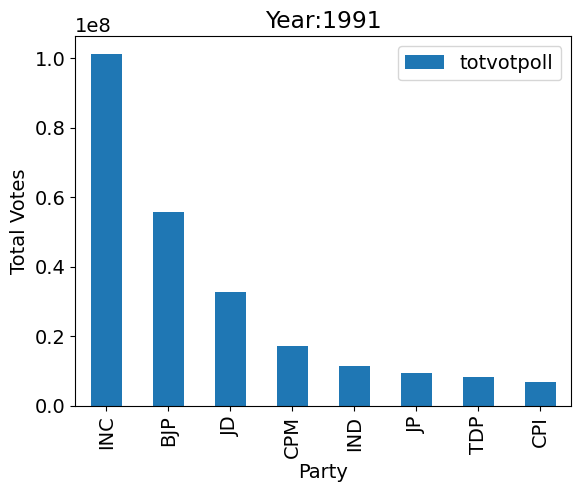

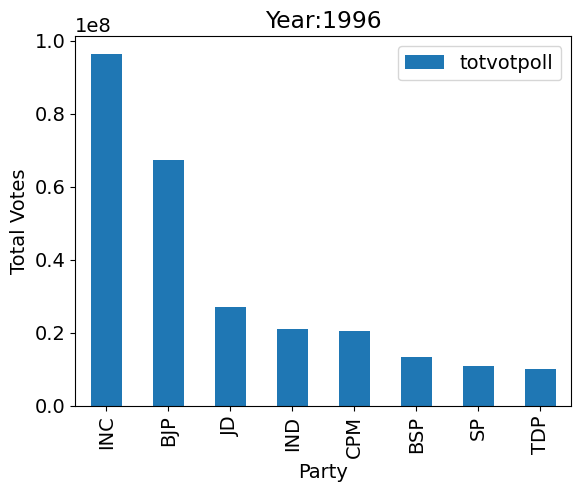

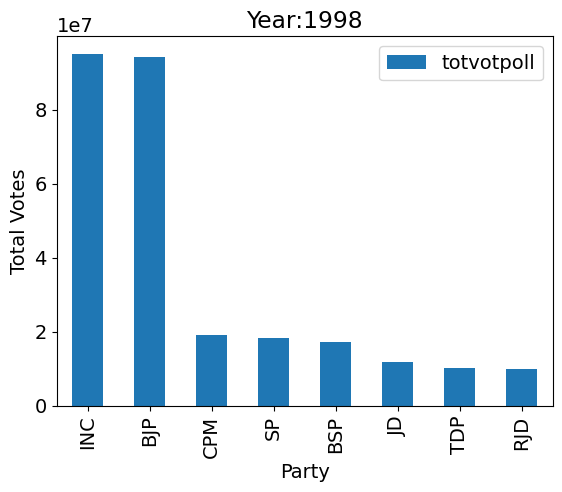

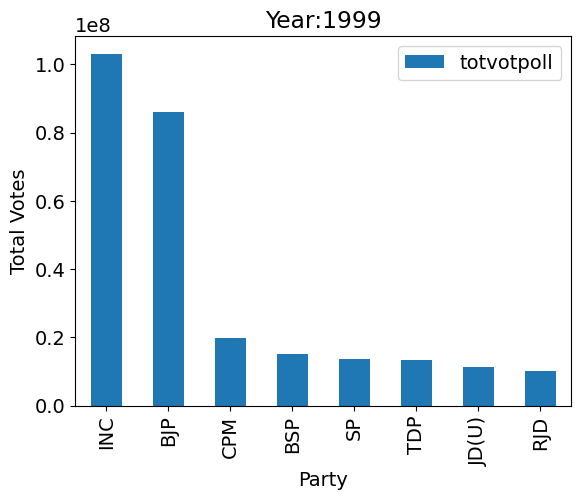

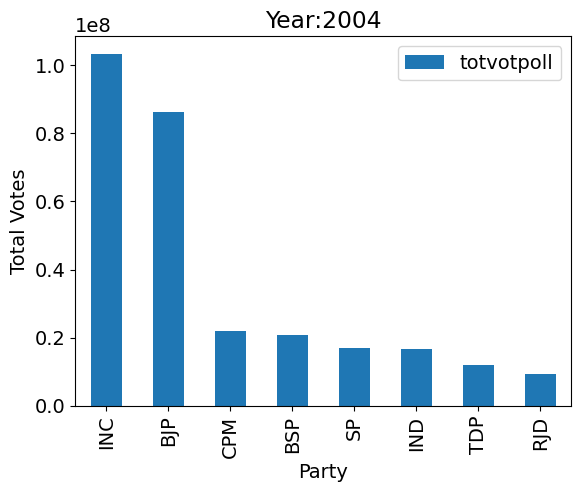

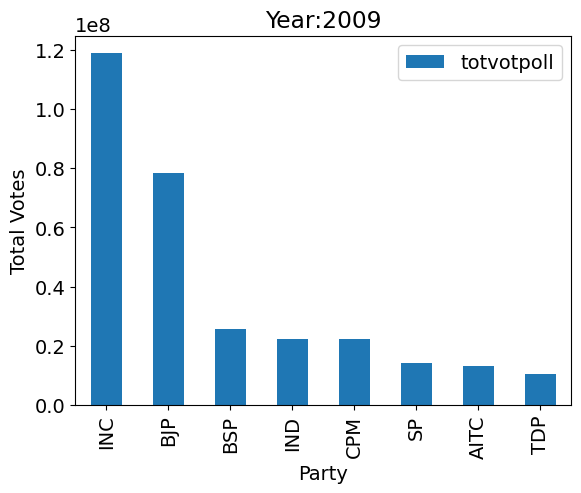

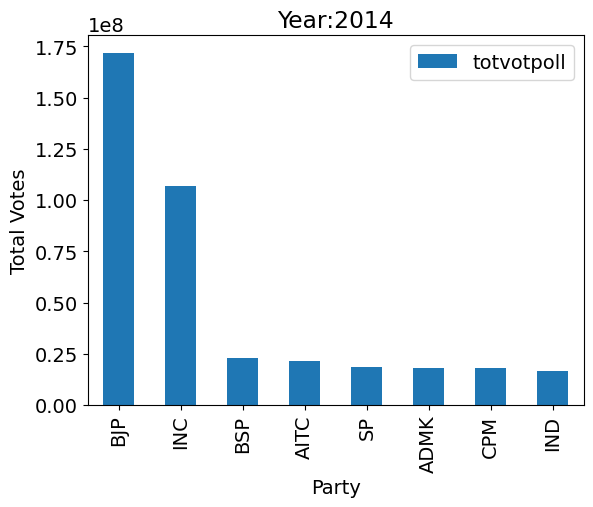

In [ ]:
year_wise_party_votes = data.groupby(['Year', 'Party'])['totvotpoll'].sum().reset_index()
years = year_wise_party_votes['Year'].unique()
year_wise_party_votes_again = {}
for year in list(years):
    year_wise_party_votes_again['Year:'+f'{year}'] = year_wise_party_votes[year_wise_party_votes['Year'] == year].sort_values(by='totvotpoll', ascending=False).head(8)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,50))
for index,(key,value) in enumerate(year_wise_party_votes_again.items()):
    ax = value.plot.bar(x='Party', y='totvotpoll')
    ax.legend(loc='upper right')
    ax.set_xlabel('Party')
    ax.set_ylabel('Total Votes')
    ax.set_title(key)
    plt.show()


Going to check the correlation between columns using heatmap.

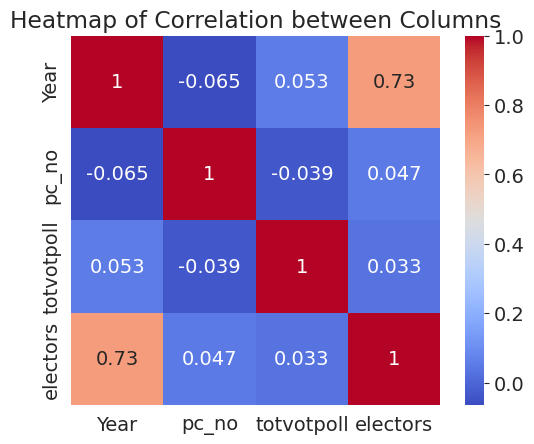

In [ ]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Columns')
plt.show()

Using pairplot to help to visualize the numeric columns.

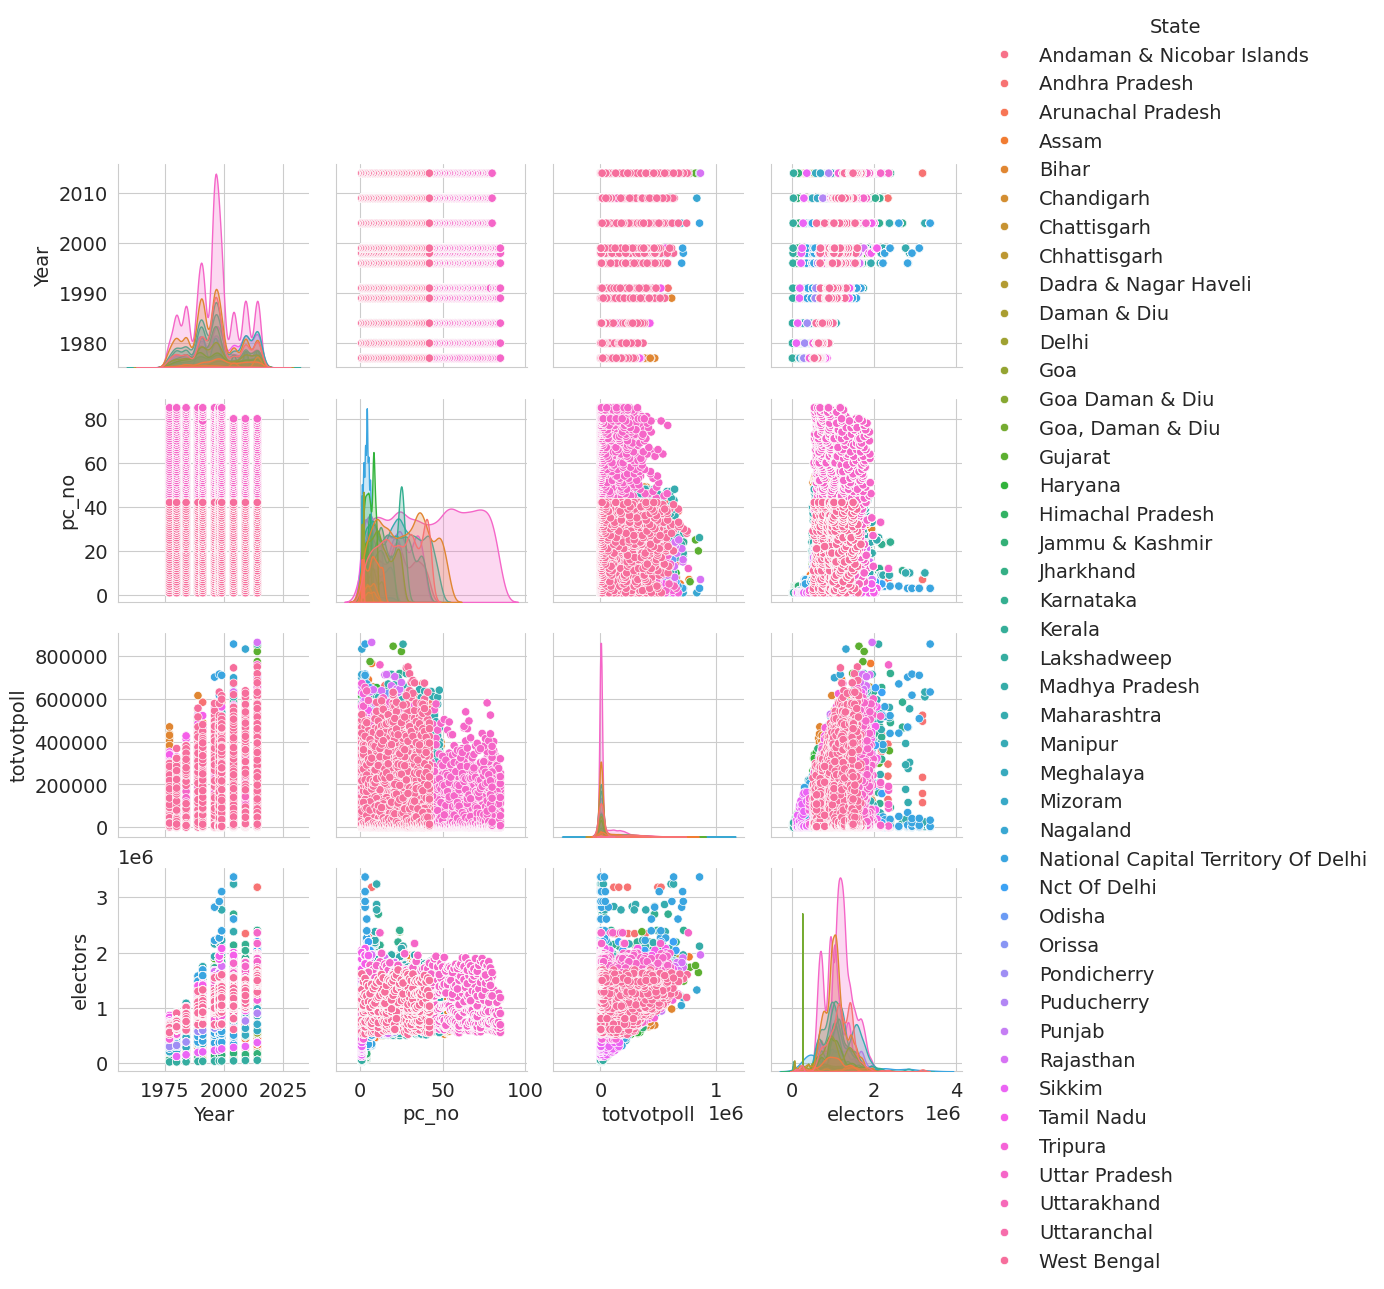

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='State')
plt.show()

**Feature Engineering**

As Feature engineering going to use label encoding for the categorigal variables.

In [ ]:
le = LabelEncoder()
data['Party_encoded'] = le.fit_transform(data['Party'])
data['State_encoded'] = le.fit_transform(data['State'])
data['Candidate_encoded'] = le.fit_transform(data['Candidate'])
data['cand_sex_encoded'] = le.fit_transform(data['cand_sex'])
data['pc_type_encoded'] = le.fit_transform(data['pc_type'])
data['pc_name_encoded'] = le.fit_transform(data['pc_name'])
data['Candidate_encoded'] = le.fit_transform(data['Candidate'])

In [ ]:
data.head()

,State,Year,pc_no,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Party_encoded,State_encoded,Candidate_encoded,cand_sex_encoded,pc_type_encoded,pc_name_encoded
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308,414,0,21483,1,0,37
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308,410,0,28681,1,0,37
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084,414,0,41947,1,0,37
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084,414,0,1794,1,0,37
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084,414,0,22786,1,0,37


Adding a new column as a voting percentage so that we can know that each candidate voting percentage.

In [ ]:
data['voting_percentage'] = (data['totvotpoll'] / data['electors']) * 100

In [ ]:
data.head()

,State,Year,pc_no,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Party_encoded,State_encoded,Candidate_encoded,cand_sex_encoded,pc_type_encoded,pc_name_encoded,voting_percentage
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308,414,0,21483,1,0,37,29.502509
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308,410,0,28681,1,0,37,41.496694
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084,414,0,41947,1,0,37,0.113442
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084,414,0,1794,1,0,37,0.130095
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084,414,0,22786,1,0,37,0.421506


Now we are going to drop the original columns.

In [ ]:
data = data.drop(['State', 'Candidate', 'Party', 'cand_sex', 'pc_type', 'pc_name'], axis=1)

In [ ]:
data.head()

,Year,pc_no,totvotpoll,electors,Party_encoded,State_encoded,Candidate_encoded,cand_sex_encoded,pc_type_encoded,pc_name_encoded,voting_percentage
0,1977,1,25168,85308,414,0,21483,1,0,37,29.502509
1,1977,1,35400,85308,410,0,28681,1,0,37,41.496694
2,1980,1,109,96084,414,0,41947,1,0,37,0.113442
3,1980,1,125,96084,414,0,1794,1,0,37,0.130095
4,1980,1,405,96084,414,0,22786,1,0,37,0.421506


Knowing the correlation between the columns using heatmap.

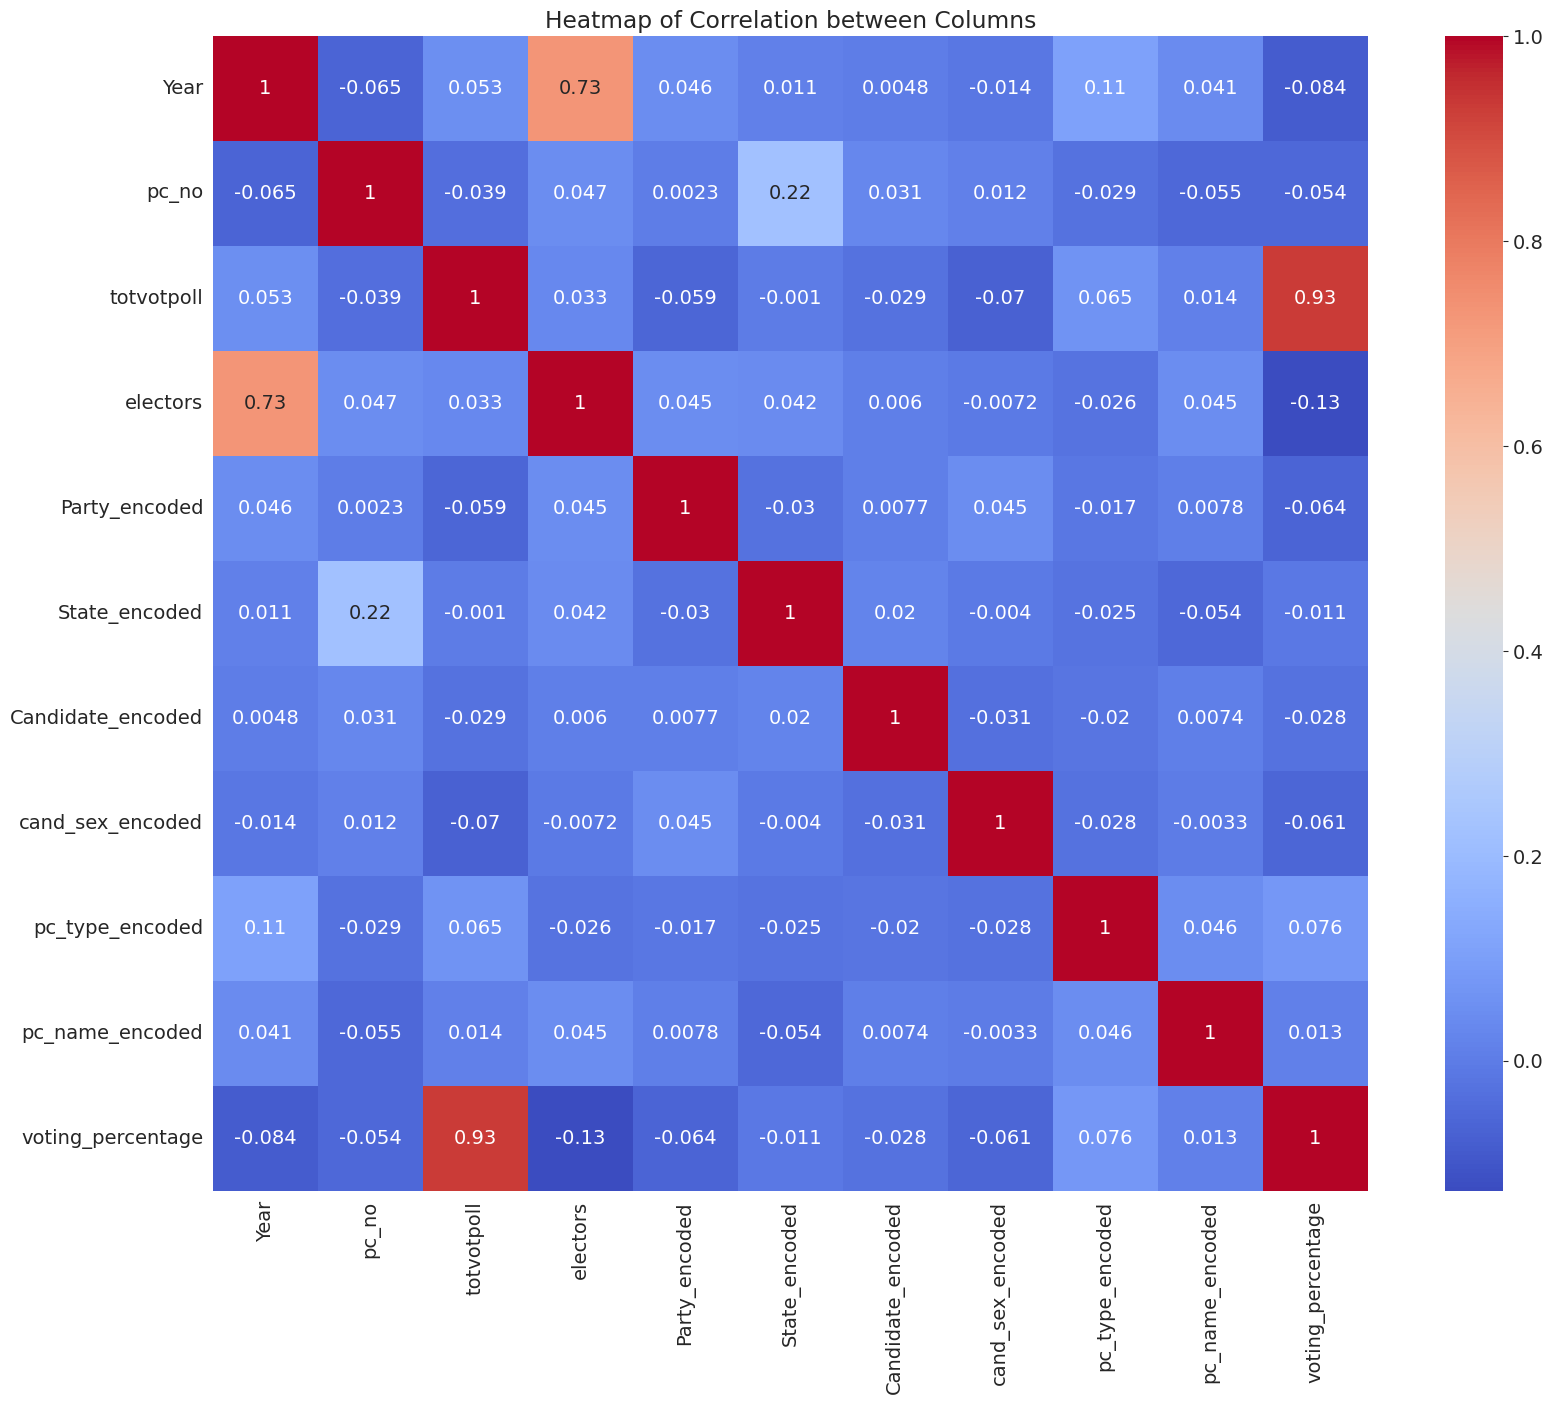

In [ ]:
plt.figure(figsize=(20, 15))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Columns')
plt.show()

Going to check the skewness for totvotpoll using the displot.




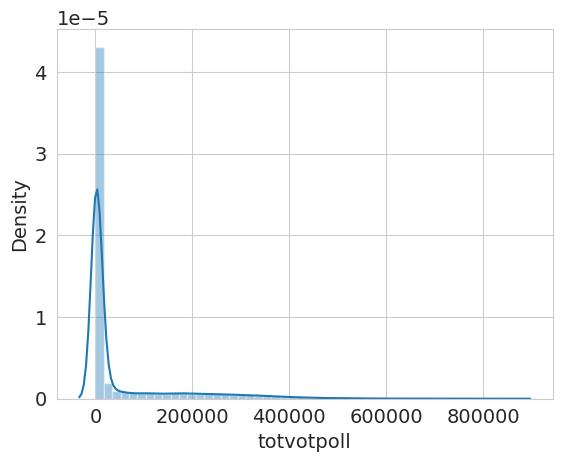

In [ ]:
sns.distplot(data['totvotpoll'])
plt.show()

Going to check the outliers for totvotpoll using boxplot.

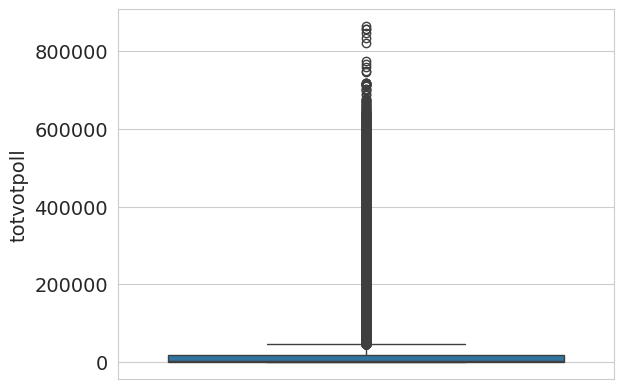

In [ ]:
sns.boxplot(data['totvotpoll'])
plt.show()

Using z-score method

In [ ]:
upper_totvotpoll = data['totvotpoll'].mean() + 3 * data['totvotpoll'].std()
lower_totvotpoll = data['totvotpoll'].mean() - 3 * data['totvotpoll'].std()
print(upper_totvotpoll)
print(lower_totvotpoll)

364526.46453058365
-264850.12441891903


Going to check the skewness for elector using the displot.




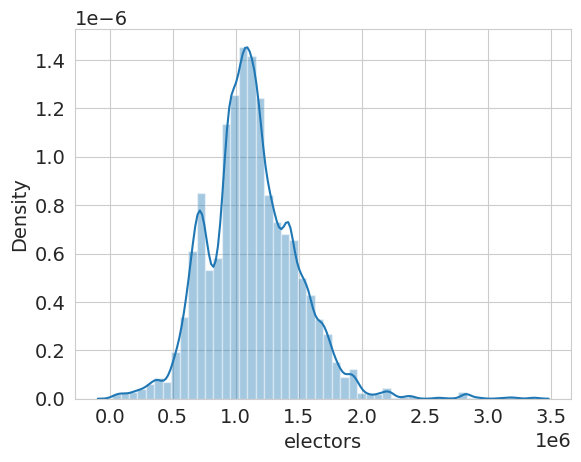

In [ ]:
sns.distplot(data['electors'])
plt.show()

Going to check the outliers for totvotpoll using boxplot.

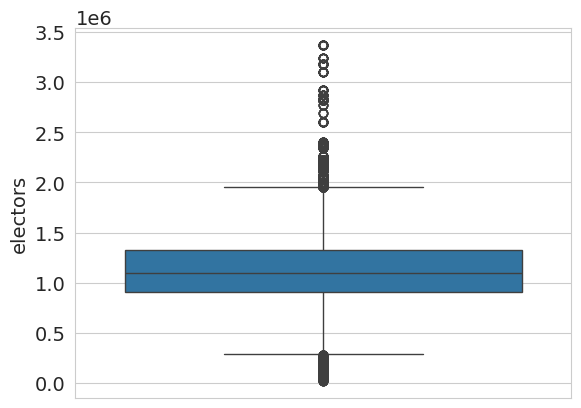

In [ ]:
sns.boxplot(data['electors'])
plt.show()

Using z-score method.

In [ ]:
electors_upper = data['electors'].mean() + 3 * data['electors'].std()
electors_lower = data['electors'].mean() - 3 * data['electors'].std()
print(electors_upper)
print(electors_lower)

2190194.5082186973
54464.12985673128


Going to check the skewness for year using the displot.




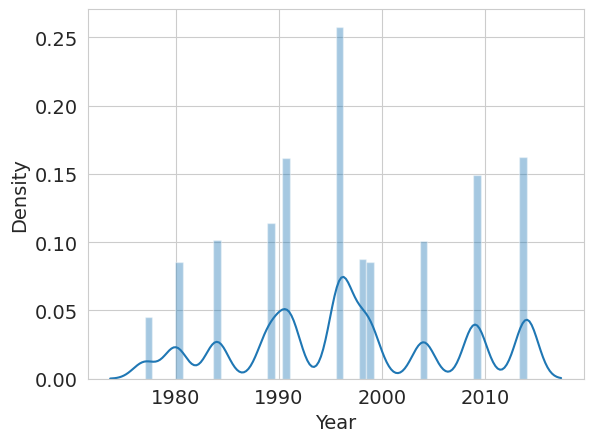

In [ ]:
sns.distplot(data['Year'])
plt.show()

Going to check the outliers for year using boxplot.

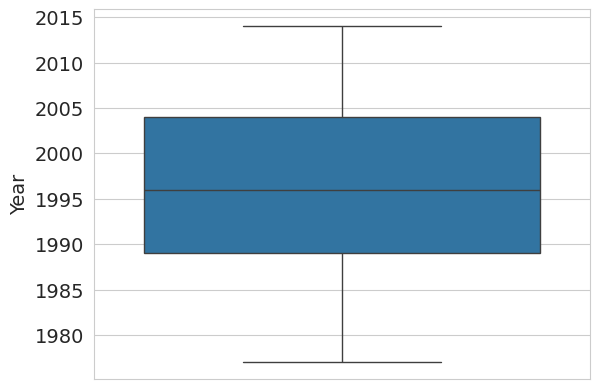

In [ ]:
sns.boxplot(data['Year'])
plt.show()

Going to check the skewness for pc_no using the displot.




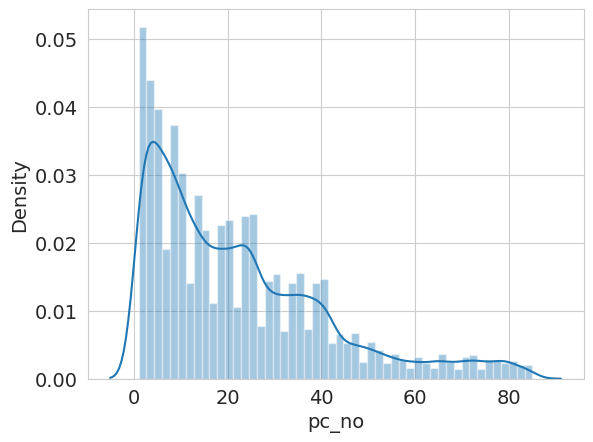

In [ ]:
sns.distplot(data['pc_no'])
plt.show()

In [ ]:
pc_no_upper = data['pc_no'].mean() + 3 * data['pc_no'].std()
pc_no_lower = data['pc_no'].mean() - 3 * data['pc_no'].std()
print(pc_no_upper)
print(pc_no_lower)

79.43189608169763
-34.806054492119664


Going to check the outliers for pc_no using boxplot.

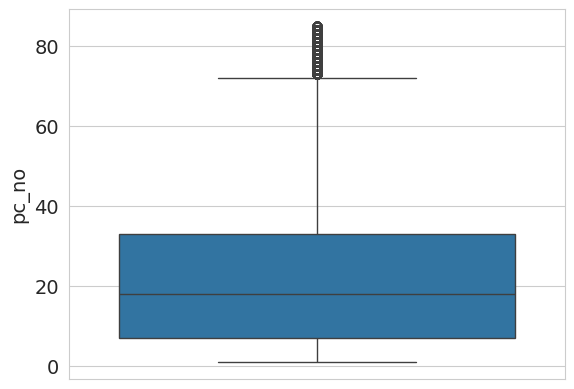

In [ ]:
sns.boxplot(data['pc_no'])
plt.show()

As you see in the above graphs skewness and outliers. In totvotpoll, it's right skewed electors are normally distributed and the year is normally distributed and pc_no is right skewed. As in outliers, we can't remove the outliers because these outliers are important. As you see in the boxplot these can't called outliers they are very close to the boxplot.

**Feature Scaling**

As feature engineering we are going to do standard scaler so that we can reduce some skewness and outliers.

In [ ]:
scaler = StandardScaler()
data['electors_scalared'] = scaler.fit_transform(data[['electors']])
data['totvotpoll_scaled'] = scaler.fit_transform(data[['totvotpoll']])
data['Year_scaled'] = scaler.fit_transform(data[['Year']])
data['pc_no_scaled'] = scaler.fit_transform(data[['pc_no']])

As we did standard scaler for the numeric values we going to check the skewness and outliers.

Skewness of Electors: 0.67


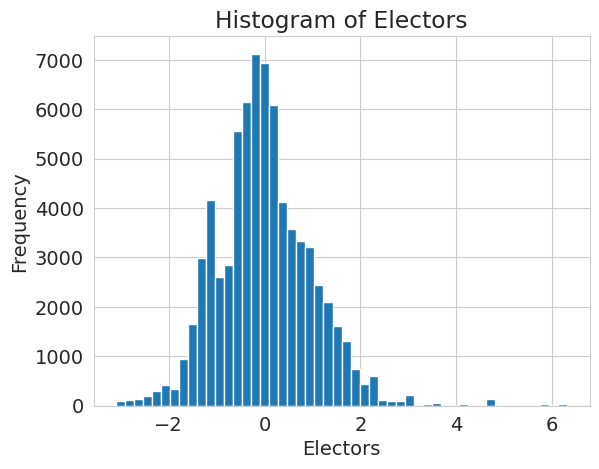

In [ ]:
skewness = skew(data['electors_scalared'])
print(f"Skewness of Electors: {skewness:.2f}")

plt.hist(data['electors_scalared'], bins=50)
plt.title("Histogram of Electors")
plt.xlabel("Electors")
plt.ylabel("Frequency")
plt.show()

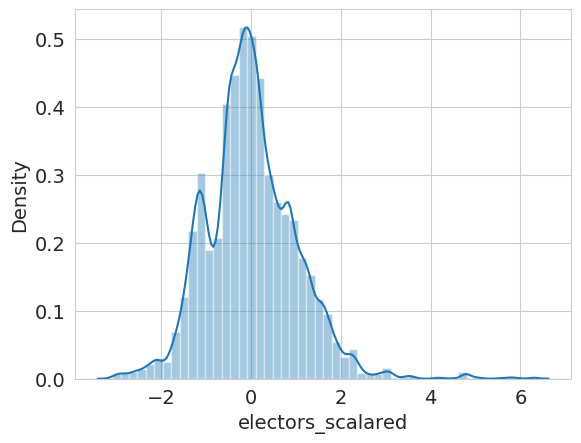

In [ ]:
sns.distplot(data['electors_scalared'])
plt.show()

After standard scaler the electors is not changed in skewness.

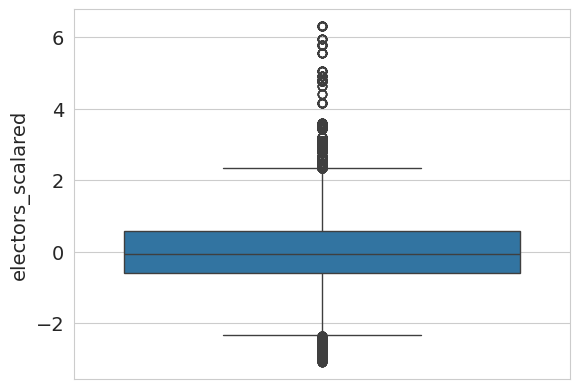

In [ ]:
sns.boxplot(data['electors_scalared'])
plt.show()

Skewness of totvotpoll: 2.53


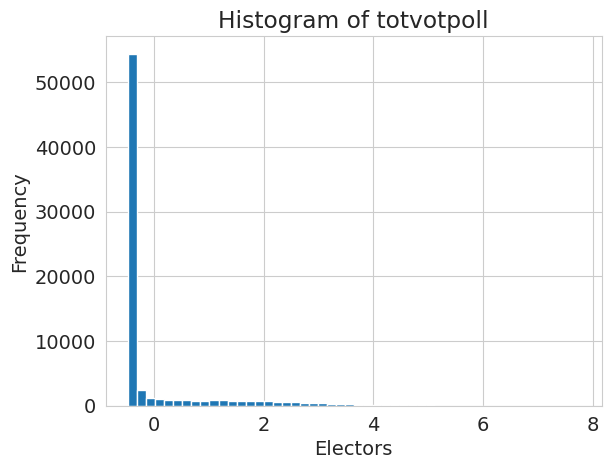

In [ ]:
from scipy.stats import skew

skewness = skew(data['totvotpoll_scaled'])
print(f"Skewness of totvotpoll: {skewness:.2f}")

plt.hist(data['totvotpoll_scaled'], bins=50)
plt.title("Histogram of totvotpoll")
plt.xlabel("Electors")
plt.ylabel("Frequency")
plt.show()

After scaling the totvotpoll also not changed.

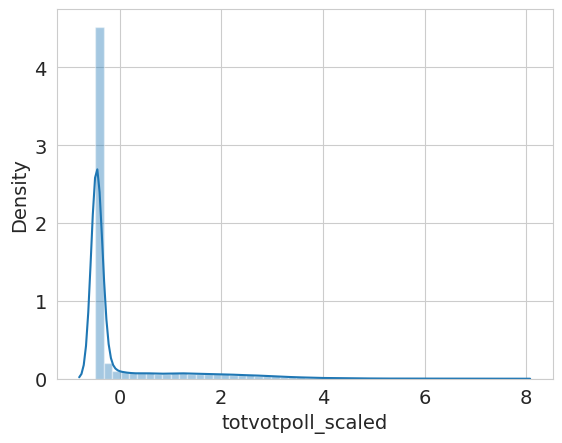

In [ ]:
sns.distplot(data['totvotpoll_scaled'])
plt.show()

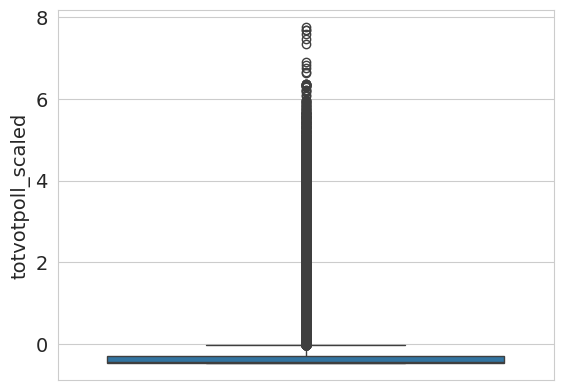

In [ ]:
sns.boxplot(data['totvotpoll_scaled'])
plt.show()

Skewness of Years: 0.06


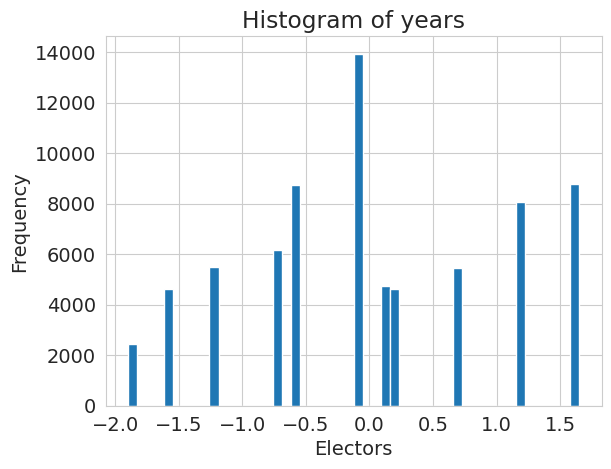

In [ ]:
from scipy.stats import skew

skewness = skew(data['Year_scaled'])
print(f"Skewness of Years: {skewness:.2f}")

plt.hist(data['Year_scaled'], bins=50)
plt.title("Histogram of years")
plt.xlabel("Electors")
plt.ylabel("Frequency")
plt.show()

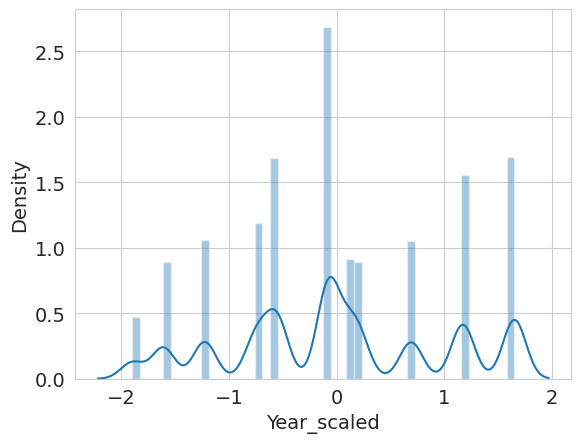

In [ ]:
sns.distplot(data['Year_scaled'])
plt.show()

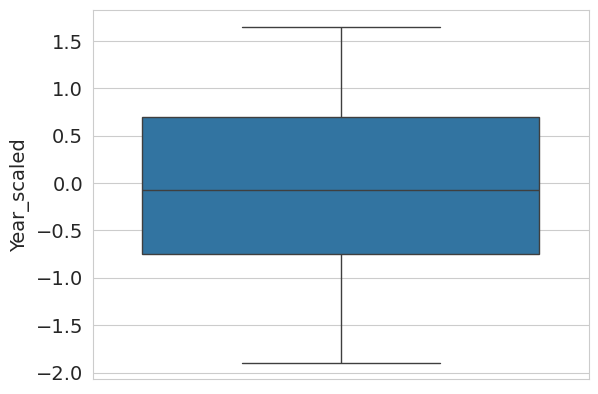

In [ ]:
sns.boxplot(data['Year_scaled'])
plt.show()

Skewness of pc_no: 1.18


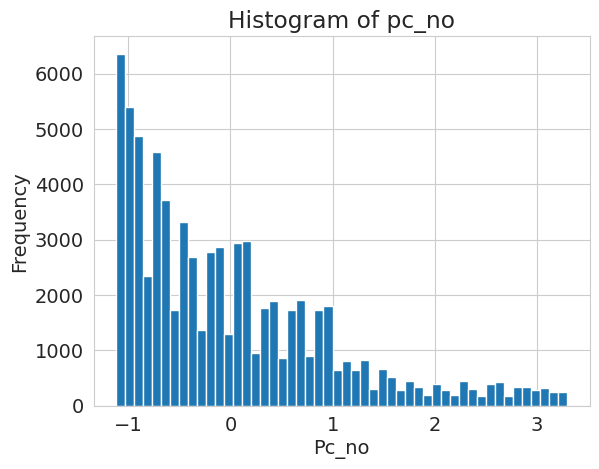

In [ ]:
skewness = skew(data['pc_no_scaled'])
print(f"Skewness of pc_no: {skewness:.2f}")

plt.hist(data['pc_no_scaled'], bins=50)
plt.title("Histogram of pc_no")
plt.xlabel("Pc_no")
plt.ylabel("Frequency")
plt.show()

pc_no also not changed.

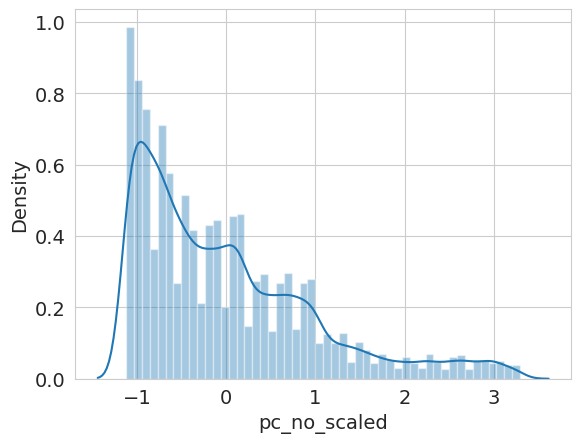

In [ ]:
sns.distplot(data['pc_no_scaled'])
plt.show()

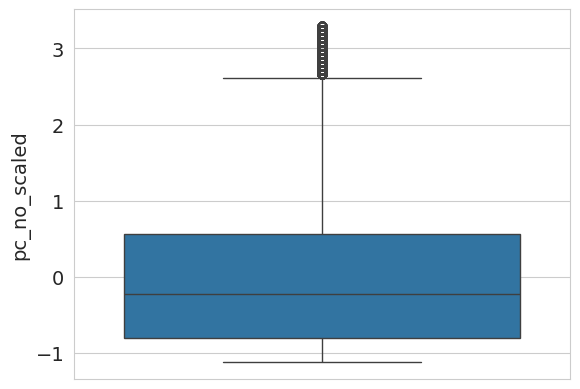

In [ ]:
sns.boxplot(data['pc_no_scaled'])
plt.show()

In [ ]:
# data['totvotpoll_log'] = np.log(data['totvotpoll']+1)
# data['pc_no_log'] = np.log(data['pc_no']+1)

In [ ]:
data.head()

,Year,pc_no,totvotpoll,electors,Party_encoded,State_encoded,Candidate_encoded,cand_sex_encoded,pc_type_encoded,pc_name_encoded,voting_percentage,electors_scalared,totvotpoll_scaled,Year_scaled,pc_no_scaled
0,1977,1,25168,85308,414,0,21483,1,0,37,29.502509,-2.913369,-0.235188,-1.896148,-1.119404
1,1977,1,35400,85308,410,0,28681,1,0,37,41.496694,-2.913369,-0.137644,-1.896148,-1.119404
2,1980,1,109,96084,414,0,41947,1,0,37,0.113442,-2.883095,-0.474084,-1.608571,-1.119404
3,1980,1,125,96084,414,0,1794,1,0,37,0.130095,-2.883095,-0.473931,-1.608571,-1.119404
4,1980,1,405,96084,414,0,22786,1,0,37,0.421506,-2.883095,-0.471262,-1.608571,-1.119404


Going to remove the original columns.

In [ ]:
# data.drop(columns=['Year','pc_no','totvotpoll','electors','totvotpoll_scaled','pc_no_scaled'],inplace=True)
data.drop(columns=['Year','pc_no','totvotpoll','electors'],inplace=True)

In [ ]:
data.head()

,Party_encoded,State_encoded,Candidate_encoded,cand_sex_encoded,pc_type_encoded,pc_name_encoded,voting_percentage,electors_scalared,totvotpoll_scaled,Year_scaled,pc_no_scaled
0,414,0,21483,1,0,37,29.502509,-2.913369,-0.235188,-1.896148,-1.119404
1,410,0,28681,1,0,37,41.496694,-2.913369,-0.137644,-1.896148,-1.119404
2,414,0,41947,1,0,37,0.113442,-2.883095,-0.474084,-1.608571,-1.119404
3,414,0,1794,1,0,37,0.130095,-2.883095,-0.473931,-1.608571,-1.119404
4,414,0,22786,1,0,37,0.421506,-2.883095,-0.471262,-1.608571,-1.119404


**Feature Selection**

As feature selection goes to Recursive Feature Elimination
and using the model as linear regression.

In [ ]:
X = data.drop(columns=['totvotpoll_scaled'],axis=1)
y = data['totvotpoll_scaled']

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

**Spliting the dataset for training and testing**

With the target variable we are going to split the data for training and testing for the data.

**Building the model**

As building the model the target variable is numerical outcomes we going to use Regression Algorithms.

**The regression algorithms:**

1.Linear Regression

2.Decision Tree Regression

3.Support Vector Regression

4.Lasso Regression

5.Random Forest Regression

6.Gradient Boosting Regression

In [ ]:
X = data.drop(columns=['totvotpoll_scaled'],axis=1)
y = data['totvotpoll_scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

def train_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, mae, rmse

def print_evaluation(model_name, r2, mse, mae, rmse):
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("\n----------------\n")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'SVR': SVR(kernel='rbf',C=1.0,epsilon=0.1),
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for model_name, model in models.items():
    y_pred = train_model(model, X_train, y_train, X_test)
    r2, mse, mae, rmse = evaluate_model(y_test, y_pred)
    print_evaluation(model_name, r2, mse, mae, rmse)

Model: Linear Regression
Mean Absolute Error (MAE): 0.17649517693570693
R-squared (R2): 0.8964091938285775
Mean Squared Error (MSE): 0.10148861060527939
Root Mean Squared Error (RMSE): 0.3185727712866864

----------------

Model: Decision Tree
Mean Absolute Error (MAE): 0.0633612994619152
R-squared (R2): 0.9709461618373343
Mean Squared Error (MSE): 0.028464240957833464
Root Mean Squared Error (RMSE): 0.1687134877768623

----------------

Model: SVR
Mean Absolute Error (MAE): 0.4779055915968966
R-squared (R2): -0.12187525634160634
Mean Squared Error (MSE): 1.099108745713778
Root Mean Squared Error (RMSE): 1.0483838732610198

----------------

Model: Lasso
Mean Absolute Error (MAE): 0.16627201350746712
R-squared (R2): 0.8624786693001162
Mean Squared Error (MSE): 0.13473057404558192
Root Mean Squared Error (RMSE): 0.3670566360189963

----------------

Model: Random Forest
Mean Absolute Error (MAE): 0.049110347070964386
R-squared (R2): 0.9794358878580693
Mean Squared Error (MSE): 0.0201467

1. **Linear Regression**

      MAE: 0.1765

      R²: 0.8964

      MSE: 0.1015

      RMSE: 0.3186

**Analysis**: The performance of Linear Regression has improved significantly compared to previous iterations. With an R² of 0.8964, the model now explains almost 90% of the variance, and the error metrics have decreased, showing that the model is making more accurate predictions.

2. **Decision Tree**

      MAE: 0.0634

      R²: 0.9709

      MSE: 0.0285

      RMSE: 0.1687

**Analysis**: The Decision Tree model continues to perform well, with an R² of 0.9709, indicating that it explains 97.1% of the variance. The low error metrics suggest that the model is still making accurate predictions, though slightly less accurate than before scaling and transformation adjustments.

3. **Support Vector Regression (SVR)**

      MAE: 0.4779

      R²: -0.1219

      MSE: 1.0991


      RMSE: 1.0484

**Analysis**: The SVR model still underperforms, with a negative R² value indicating that it does worse than a simple mean model. Despite scaling, the SVR model seems unsuitable for this dataset.
4. **Lasso**

    MAE: 0.1663

    R²: 0.8625

    MSE: 0.1347

    RMSE: 0.3671

**Analysis**: The Lasso model shows decent performance with an R² of 0.8625, explaining about 86.2% of the variance. It performs similarly to Linear Regression but slightly worse, which is expected as Lasso includes regularization.

5. **Random Forest**

    MAE: 0.0491

    R²: 0.9794

    MSE: 0.0201

    RMSE: 0.1419

**Analysis**: The Random Forest model continues to perform exceptionally well, with a high R² and low error metrics. This model remains a strong contender, providing accurate predictions with minimal error.

6. **Gradient Boosting**

    MAE: 0.0067

    R²: 0.9996

    MSE: 0.0004

    RMSE: 0.0200

**Analysis**: Gradient Boosting continues to outperform all other models, with an R² close to 1 and extremely low error metrics. This model is the best performer for this dataset, providing highly accurate predictions.

As to select a model we will choose Linear regression but other model has performed well except support vector regression. Why I choosed linear regression other model can be overfitting. linear regression will be the best model.

**HyperParameter Tuning**

In Hyperparameter Tuning we are going to choose the random search because as you see this dataset is very huge go that we can use random search search will be very useful.

In [ ]:
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params':{'fit_intercept': [True, False]}
    },
    # 'Decision Tree': {
    #     'model': DecisionTreeRegressor(),
    #     'params':{'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 5, 10]}
    # },
    # 'Random Forest': {
    #     'model': RandomForestRegressor(),
    #     'params':{'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 5, 10]}
    # },
    # 'Lasso': {
    #     'model': Lasso(),
    #     'params':{'alpha': [0.001, 0.01, 0.1, 1.0],'max_iter': [1000, 2000, 3000]}
    # },
    # 'Gradient Boosting': {
    #     'model': GradientBoostingRegressor(),
    #     'params':{'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 5, 7],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 5, 10]}
    # },
    # 'SVR': {
    #     'model': SVR(),
    #     'params':{'C': [0.1, 1.0, 10.0],'epsilon': [0.1, 0.2, 0.5],'kernel': ['linear', 'rbf']}
    # }

}

for model_name, config in models.items():
    model = config['model']
    params = config['params']
    random_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1)
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("\n----------------\n")

Model: Linear Regression
Best Parameters: {'fit_intercept': True}
Mean Absolute Error (MAE): 0.17649517693570693
R-squared (R2): 0.8964091938285775
Mean Squared Error (MSE): 0.10148861060527939
Root Mean Squared Error (RMSE): 0.3185727712866864

----------------



*After Hyperparameter tuning I just used the linear regression model because the system I am using can't handle all the models as I selected the linear regression model for hyperparameter tuning.*




**Best Parameters:**

fit_intercept: True

Performance Metrics:

Mean Absolute Error (MAE): 0.1765

R-squared (R²): 0.8964

Mean Squared Error (MSE): 0.1015

Root Mean Squared Error (RMSE): 0.3186

**Analysis**:

**Fit Intercept**: The best parameter found was to include the intercept(fit_intercept=True), which is standard in most linear regression problems.

**R² Value**: An R² of 0.8964 indicates that the model explains approximately 89.6% of the variance in the target variable. This is a strong performance for a linear model, especially after tuning.

**Error Metrics**: The MAE, MSE, and RMSE values are relatively low, suggesting that the model is making accurate predictions.

**Conclusion**:
The Linear Regression model has performed well after Random Search tuning, achieving a good balance between simplicity and accuracy. With an R² close to 0.9, the model is explaining a substantial amount of the variance, and the error metrics indicate reasonable prediction accuracy.

If we are satisfied with these results, we can confidently use this model for prediction.









